In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import datetime as dt
import seaborn as sns

In [2]:
df=pd.read_csv('fx_expanded_majors.csv', delimiter=';')

In [3]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

df=df.set_index('Date')

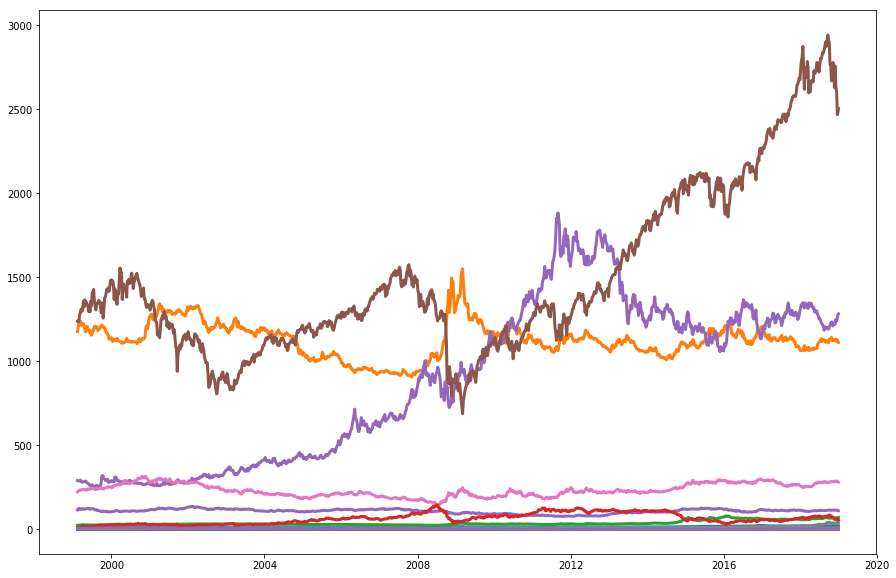

In [4]:
plt.figure(figsize=(15,10.))
for c in df.loc[:,df.columns!='USDIDR'].columns.values:
    plt.plot(df.index, df[c], lw=3)


Moving window generation

In [5]:
def rolling_pca(window_data):
    transf=StandardScaler().fit_transform(window_data)
    pca = PCA(n_components=2)
    pca.fit(transf)
    return pca.components_[0], pca.components_[1]

#calculates 1st and 2nd principal components for the given data 

In [6]:
X_std=StandardScaler().fit_transform(df)
# before using PCA, scaling required

X_std_1=pd.DataFrame(X_std,index=df.index,columns=df.columns.tolist())
# create DataFrame out of scaled data

C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MO_Reuters_2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [126]:
curr=X_std_1.drop(['OIL','US10YR','SPX'],axis=1)
#choose only currencies

In [130]:
pc1=[]
pc2=[]
weights1=[]
weights2=[]

for i in curr.index.year.unique():
    data=rolling_pca(curr[curr.index.year==i])
    pc1.append(data[0])
    pc2.append(data[1])
    weights1.append(np.square(data[0]))
    weights2.append(np.square(data[1]))
    
# Find 1 and second principal components for every year from 1999-2018
# By squaring find the weights??? 

In [131]:
w1=pd.DataFrame(weights1,index=curr.index.year.unique(),columns=curr.columns.tolist())
w2=pd.DataFrame(weights2,index=curr.index.year.unique(),columns=curr.columns.tolist())
# create DataFrames from weights of each currency by year

w1_tr=w1.transpose()
w2_tr=w2.transpose()

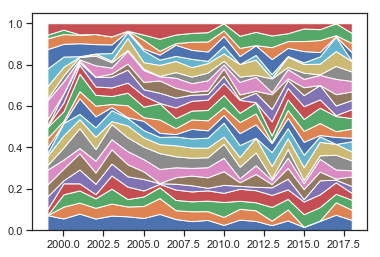

In [132]:
fig, ax = plt.subplots()
ax.stackplot(X_std_1.index.year.unique(), w1_tr)
plt.show()

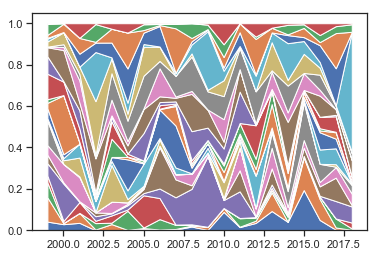

In [133]:
fig, ax = plt.subplots()
ax.stackplot(X_std_1.index.year.unique(), w2_tr)
plt.show()

Further: Illustrate weights change within time graphically

Let's do the factor analysis

In [61]:
factor_1=pd.DataFrame(index=df.index,columns=['factor_1'])

In [69]:
for i in factor_1.index.year.unique():
    factor_1.loc[factor_1.index.year==i]=X_std_1[X_std_1.index.year==i].dot(w1_tr[[i]])

In [71]:
factor_1.head(5)

,factor_1
Date,
2018-12-31,0.878792
2018-12-28,0.90502
2018-12-21,0.925919
2018-12-14,0.919389
2018-12-07,0.898793


In [103]:
X_std_2=X_std_1
X_std_2=X_std_2.join(factor_1)
X_std_2=X_std_2[['EURUSD', 'GBPUSD', 'OIL','US10YR','SPX','factor_1']]

**Where is correlation of factor_1???
<br> Add factor 2
<br> Plot intuitively**

In [112]:
X_std_2.corr()

,EURUSD,GBPUSD,OIL,US10YR,SPX
EURUSD,1.000000,0.548419,0.782431,-0.377589,-0.077474
GBPUSD,0.548419,1.000000,0.225087,0.355716,-0.471216
OIL,0.782431,0.225087,1.000000,-0.546158,0.163462
US10YR,-0.377589,0.355716,-0.546158,1.000000,-0.456090
SPX,-0.077474,-0.471216,0.163462,-0.456090,1.000000


([<matplotlib.axis.YTick at 0xe24c400>,
 <a list of 5 Text yticklabel objects>)

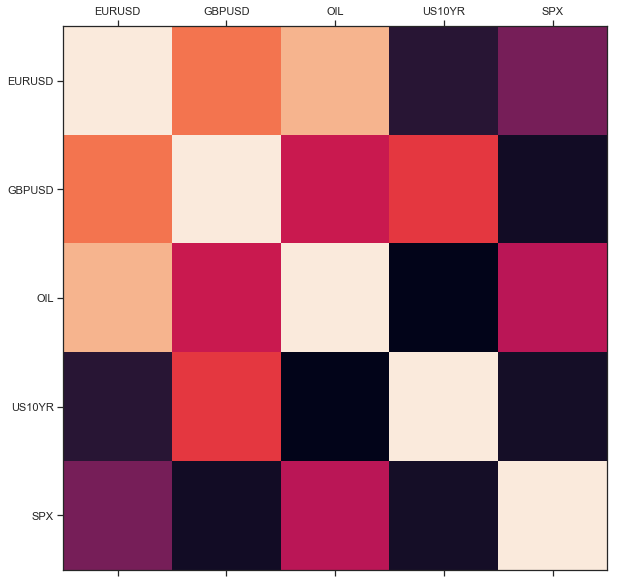

In [108]:
corr=X_std_2.corr()
size=10

fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)